# Handling Missing Data

- Remove Records or Rows (CCA)
- Impute Technique
    - Univariate
        - Numeric
            - Mean/Median
            - Random Value
            - End of Distribution
        - Categorical
            - Mode
            - "missing" value
    - Multivariate
        - KNN Imputer
        - Iterative Imputer
        
## Complete Case Analysis (CCA):
Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists in discarding observations where values in any of the variables are missing.

Complete Case Analysis means literally analyzing only those observations for which there is information in all of the variables in the dataset.

**Assumption for CCA:**

- Missing values are completly at random.(MCAR - Missing Completly At Random)

**Advantages:**

- Easy to implement as no data manipulation required
- Preserves variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset).

**Disadvantages:**

- It can exclude a large fraction of the original dataset (if missing data is abundant)
- Excluded observations could be infomative for the analysis (if data is not missing at random)
- When using the trained models in production, the model will not know how to handle missing data.

**When to use CCA?**

- MCAR
- If there are 5% or less % data missing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Datasets/DataScience_Jobs/data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
print(df.shape)
df.isnull().mean() * 100

(19158, 13)


enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
# extract that columns on which can apply CCA
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
16810,0.624,Full time course,Graduate,4.0,20.0
10304,0.924,no_enrollment,Graduate,6.0,12.0
12818,0.624,no_enrollment,Masters,5.0,87.0
17246,0.923,no_enrollment,Graduate,4.0,NaN
17723,0.920,no_enrollment,Masters,20.0,102.0


In [10]:
# How many % data will be there after removing missing data rows
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [11]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

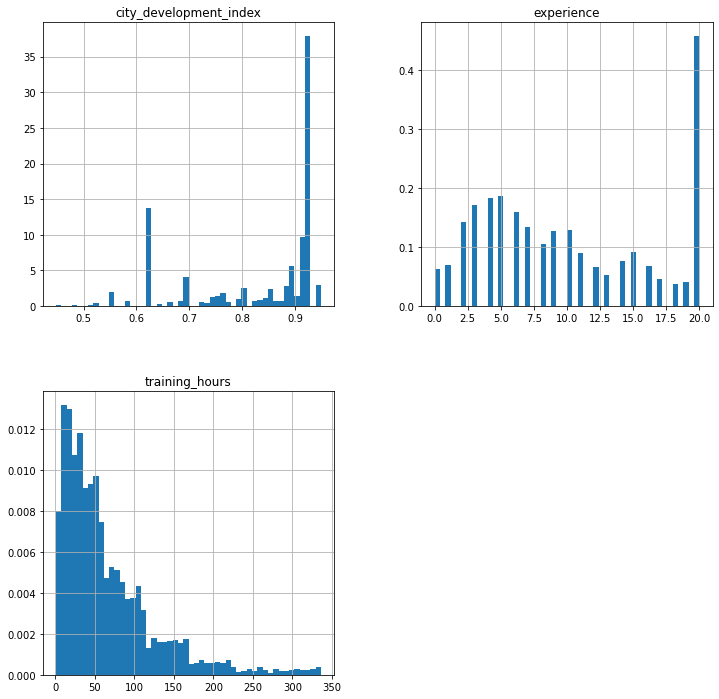

In [12]:
new_df.hist(bins = 50, density = True, figsize = (12, 12))
plt.show()

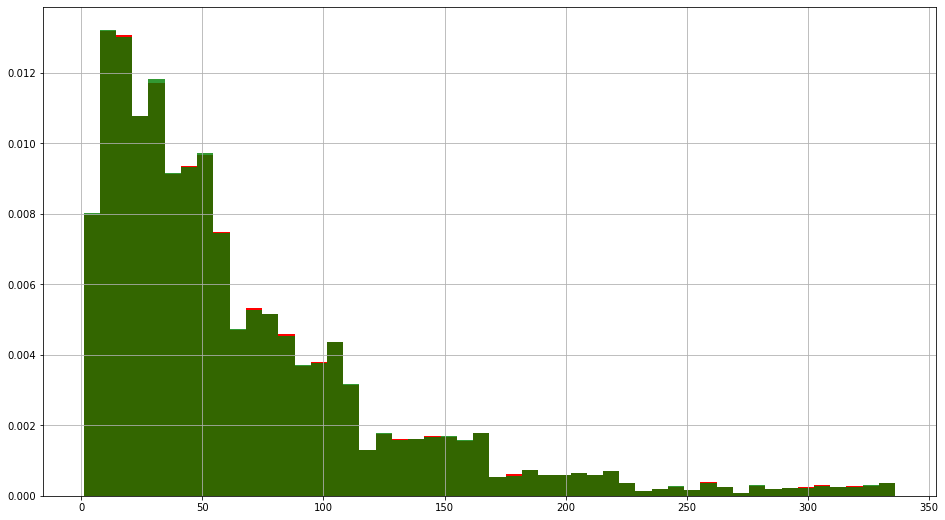

In [18]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original data
df["training_hours"].hist(bins = 50, ax = ax, density = True, color = "red")

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df["training_hours"].hist(bins = 50, ax = ax, color = "green", density = True, alpha = 0.8)

plt.show()

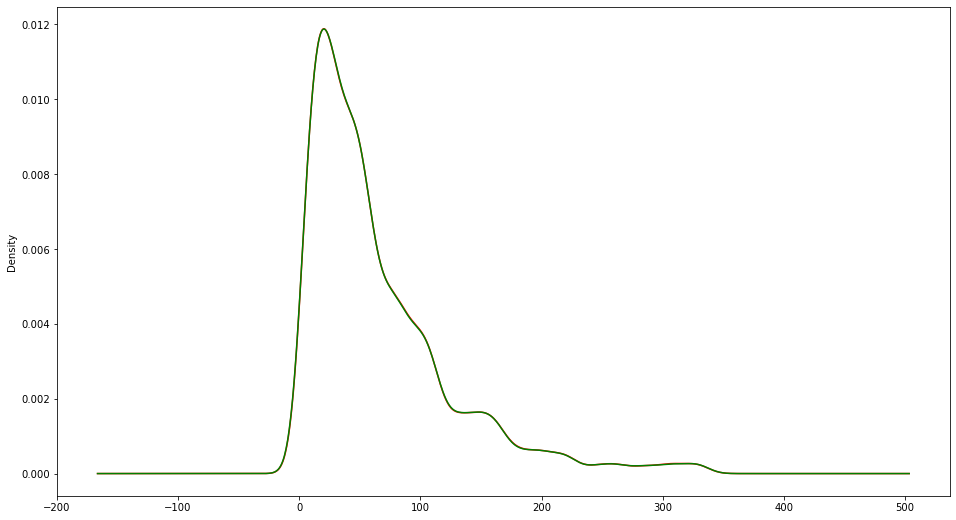

In [21]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original data
df["training_hours"].plot.density(color = "red")

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df["training_hours"].plot.density(color = "green")

plt.show()

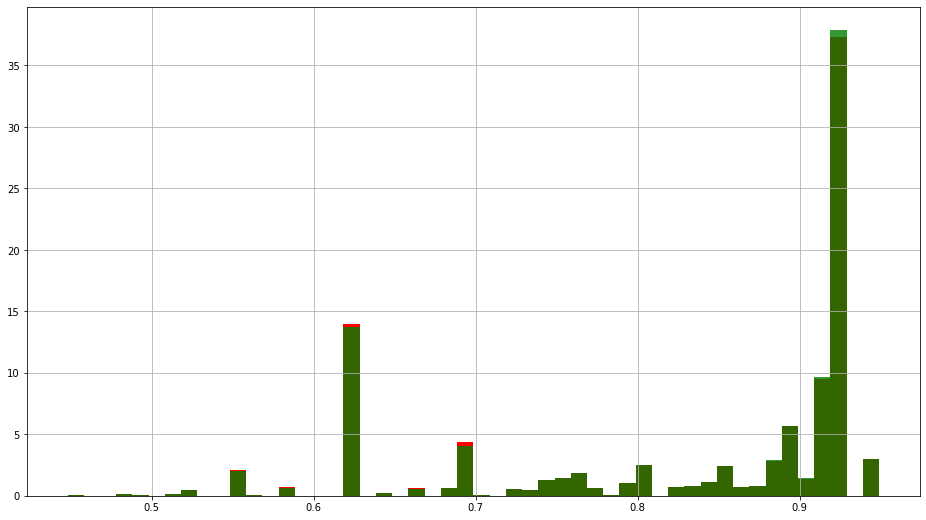

In [19]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original data
df["city_development_index"].hist(bins = 50, ax = ax, density = True, color = "red")

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df["city_development_index"].hist(bins = 50, ax = ax, color = "green", density = True, alpha = 0.8)

plt.show()

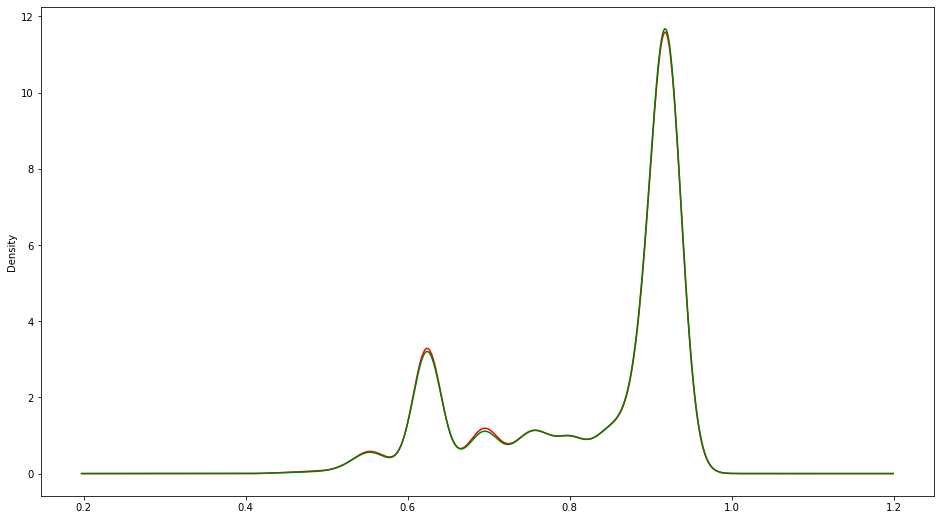

In [22]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original data
df["city_development_index"].plot.density(color = "red")

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df["city_development_index"].plot.density(color = "green")

plt.show()

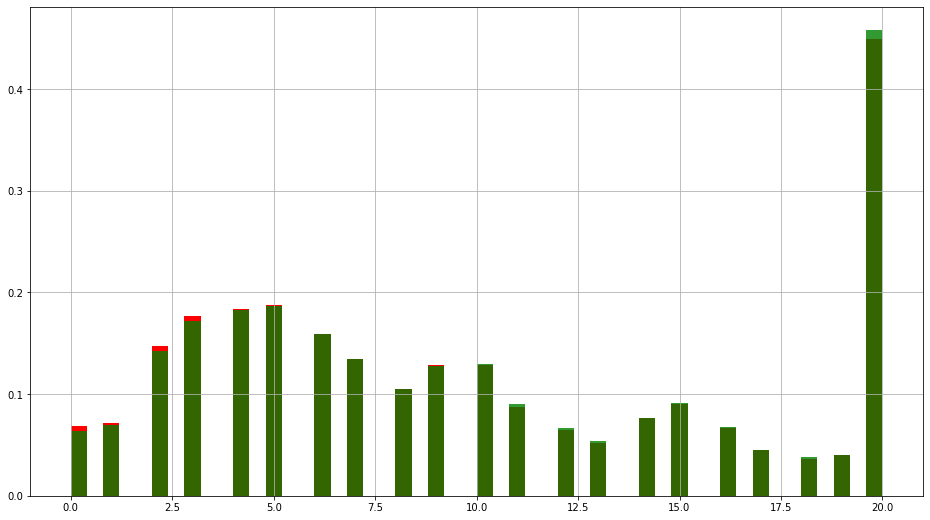

In [23]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original data
df["experience"].hist(bins = 50, ax = ax, density = True, color = "red")

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df["experience"].hist(bins = 50, ax = ax, color = "green", density = True, alpha = 0.8)

plt.show()

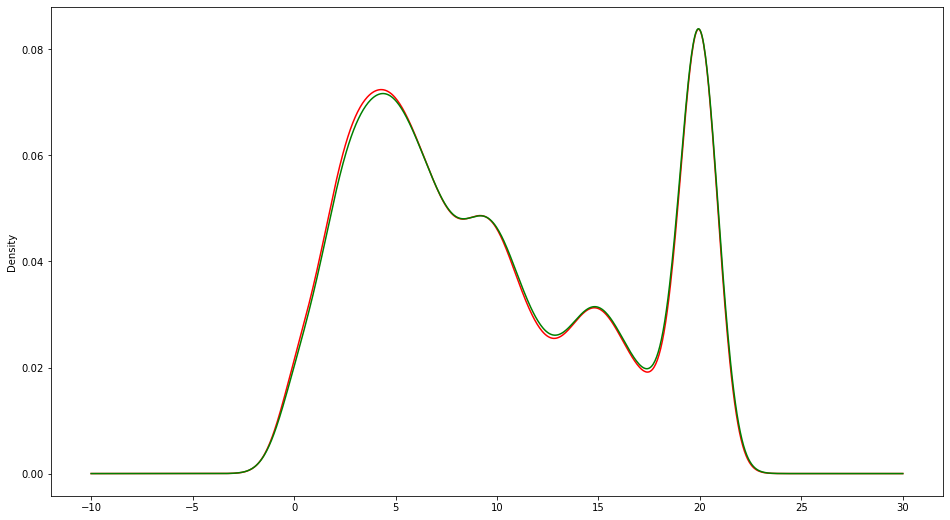

In [24]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original data
df["experience"].plot.density(color = "red")

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df["experience"].plot.density(color = "green")

plt.show()

In [25]:
# now time to categorical data
temp = pd.concat([
    # percentage of observations per category, original data
    df["enrolled_university"].value_counts() / len(df),
    
    # percentage of observations per category, cca data
    new_df["enrolled_university"].value_counts() / len(new_df)
], axis = 1)

# add column names
temp.columns = ["original", "cca"]

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [26]:
temp = pd.concat([
    # percentage of observations per category, original data
    df["education_level"].value_counts() / len(df),
    
    # percentage of observations per category, cca data
    new_df["education_level"].value_counts() / len(new_df)
], axis = 1)

# add column names
temp.columns = ["original", "cca"]

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


## Handling Numerical Data
### Mean/Median Imputation

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

pd.options.mode.chained_assignment = None  # default='warn'

In [27]:
df = pd.read_csv("../Datasets/Titanic/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [29]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [30]:
X = df.drop(columns = ["Survived"], axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [31]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

#### Without Using Scikit Learn

In [7]:
mean_age    = X_train["Age"].mean()
median_age  = X_train["Age"].median()

mean_fare   = X_train["Fare"].mean()
median_fare = X_train["Fare"].median()

In [8]:
X_train["Age_median"]  = X_train["Age"].fillna(median_age)
X_train["Age_mean"]    = X_train["Age"].fillna(mean_age)

X_train["Fare_median"] = X_train["Fare"].fillna(median_fare)
X_train["Fare_mean"]   = X_train["Fare"].fillna(mean_fare)

In [9]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
293,24.0,8.8500,0,24.00,24.000000,8.8500,8.850000
490,NaN,NaN,1,28.75,29.785904,14.4583,32.617597
379,19.0,7.7750,0,19.00,19.000000,7.7750,7.775000
108,38.0,7.8958,0,38.00,38.000000,7.8958,7.895800
132,47.0,14.5000,1,47.00,47.000000,14.5000,14.500000


In [10]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


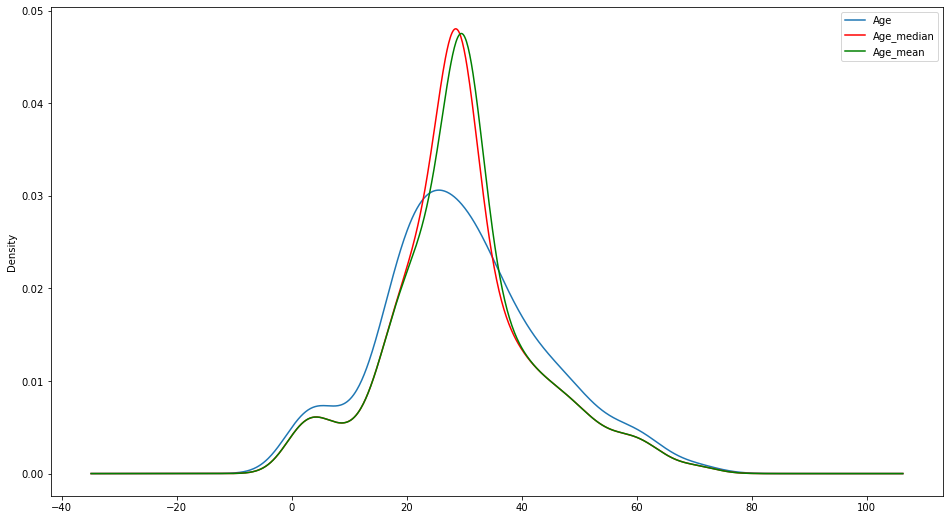

In [11]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

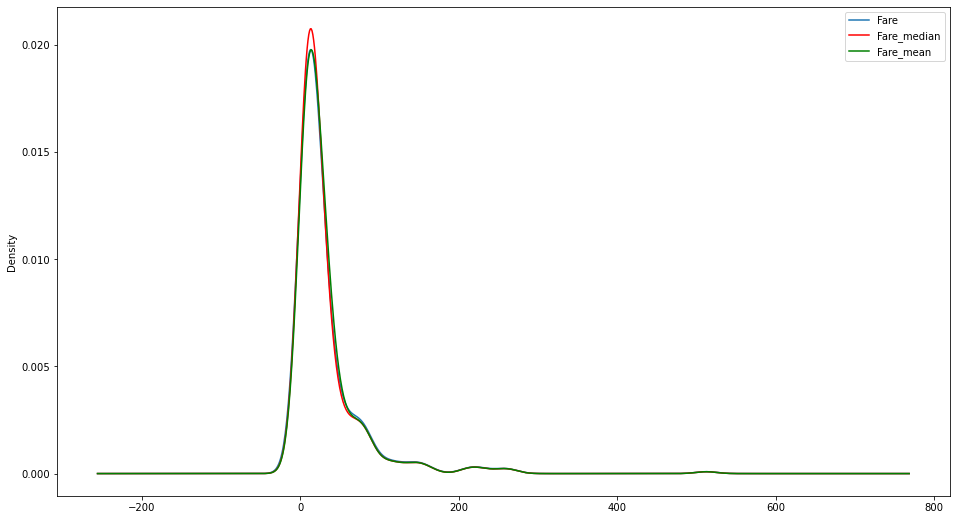

In [12]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [13]:
# co-variance
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [14]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


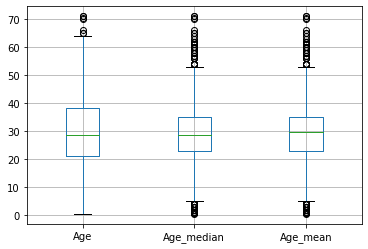

In [15]:
X_train[["Age", "Age_median", "Age_mean"]].boxplot()
plt.show()

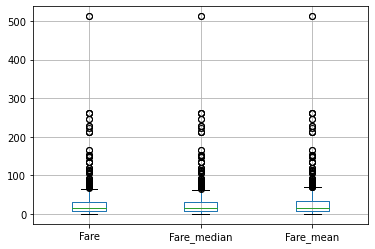

In [16]:
X_train[["Fare", "Fare_median", "Fare_mean"]].boxplot()
plt.show()

#### Using Scikit Learn

In [32]:
imputer1 = SimpleImputer(strategy = "median")
imputer2 = SimpleImputer(strategy = "mean")

In [33]:
trf = ColumnTransformer([
    ("imputer1", imputer1, ["Age"]),
    ("imputer2", imputer2, ["Fare"])
], remainder = "passthrough")

trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [34]:
trf.named_transformers_["imputer1"].statistics_

array([28.75])

In [35]:
trf.named_transformers_["imputer2"].statistics_

array([32.61759689])

In [36]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [38]:
X_train = trf.transform(X_train)
X_test  = trf.transform(X_test)

X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

### Arbitrary Value Imputation

In [39]:
df = pd.read_csv("../Datasets/Titanic/titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [41]:
X = df.drop(columns = ["Survived"], axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

X_train.shape, X_test.shape

((712, 3), (179, 3))

#### Without Using Scikit Learn

In [42]:
X_train["Age_99"]      = X_train["Age"].fillna(99)
X_train["Age_minus1"]  = X_train["Age"].fillna(-1)

X_train["Fare_999"]    = X_train["Fare"].fillna(999)
X_train["Fare_minus1"] = X_train["Fare"].fillna(-1)

In [44]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())
print("----------------------------------------------------------------")
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
----------------------------------------------------------------
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


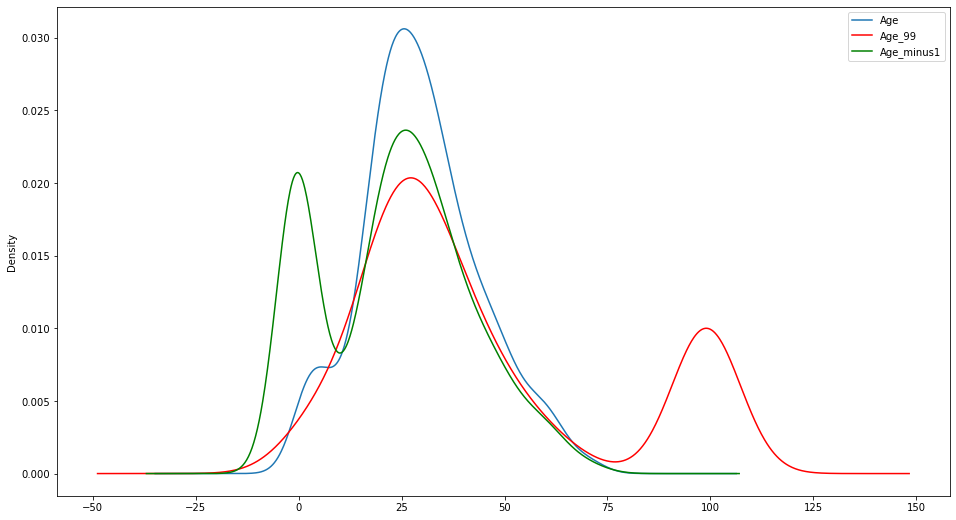

In [45]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

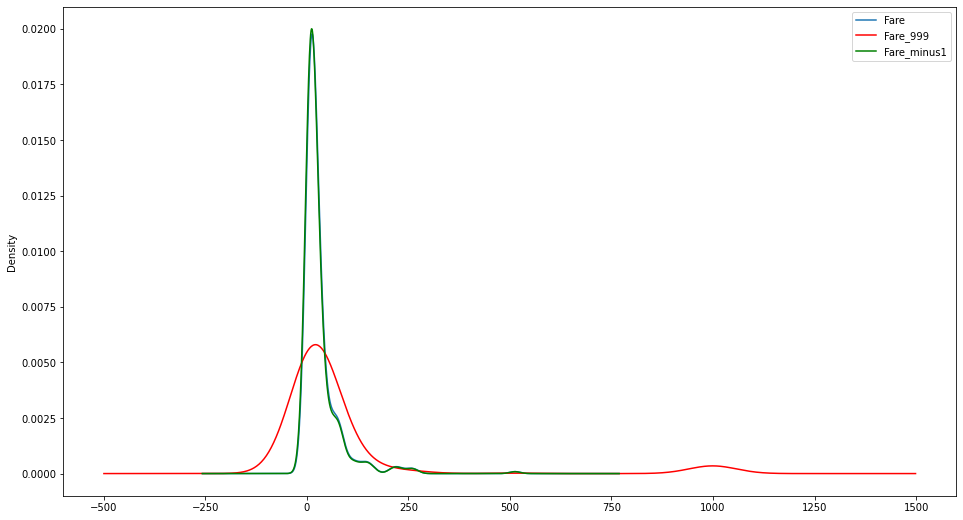

In [46]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

In [47]:
# co-variance
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [48]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


#### Using Scikit Learn

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [51]:
imputer1 = SimpleImputer(strategy = "constant", fill_value = 99)
imputer2 = SimpleImputer(strategy = "constant", fill_value = 999)

trf      = ColumnTransformer([
    ("imputer1", imputer1, ["Age"]),
    ("imputer2", imputer2, ["Fare"])
], remainder = "passthrough")

trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [52]:
X_train = trf.transform(X_train)
X_test  = trf.transform(X_test)

### End of Distribution Imputation

To fillup with arbitary values are difficult because it is difficult to choose the arbitary values. To solve the problem, **End of Distribution Imputation** comes into picture. If your data is normally distributed, then this method will fill those missing values with that values which are at the skew position of the distribution. That time, formula will be $ = mean ± 3\sigma$. If the data is skewed, then you apply *IQR Proximity rule*. That time you will fill up missing values using this formula ($Q_1 - 1.5 * IQR$ or $Q_3 + 1.5 * IQR$ where $IQR = Q_3 - Q_1$)

**Pros:**

- Easy to use

**Cons:**

- PDF will change
- Covariance will change
- Variance will change

**When you data is not missing at random, that time you will do this technique to fillup missing values**

## Handling Categorical Missing Data

**Most used techniques to fill categorical missing data are:**

- Fill with **Most Frequent** values. That is **mode**. But that is only applicable on MCAR(missing completly at random) data. The advantages is that it is easy to implement. But downside is that it changes the distribution of the data.
- Can fill those missing values simply by **"missing"** word. When your data has 10% or more than that missing values, you will do this approach.
- There is also some other techniques like randomly fill up

### Frequent Value Imputation
#### Without Using Scikit Learn

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [54]:
df = pd.read_csv("../Datasets/Housing/train.csv", usecols = ["GarageQual", "FireplaceQu", "SalePrice"])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [55]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

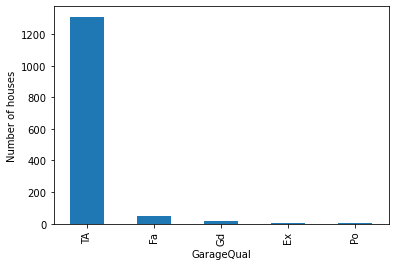

In [56]:
df["GarageQual"].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of houses")
plt.show()

In [58]:
df["GarageQual"].mode()

0    TA
dtype: object

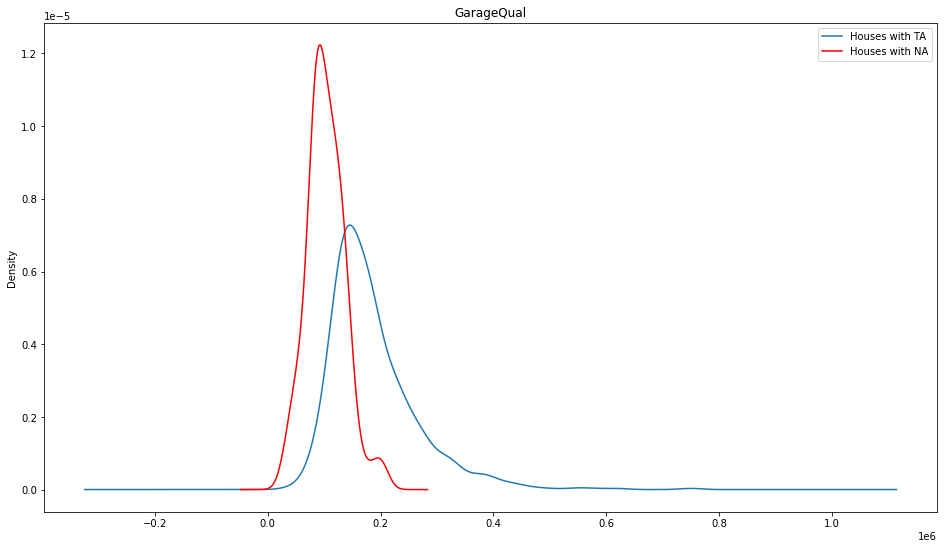

In [59]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

df[df["GarageQual"] == "TA"]["SalePrice"].plot(kind = "kde", ax = ax)

df[df["GarageQual"].isnull()]["SalePrice"].plot(kind = "kde", ax = ax, color = "red")

lines, labels = ax.get_legend_handles_labels()
labels = ["Houses with TA", "Houses with NA"]
ax.legend(lines, labels, loc = "best")

plt.title("GarageQual")
plt.show()

In [60]:
temp = df[df["GarageQual"] == "TA"]["SalePrice"]

df["GarageQual"].fillna("TA", inplace = True)

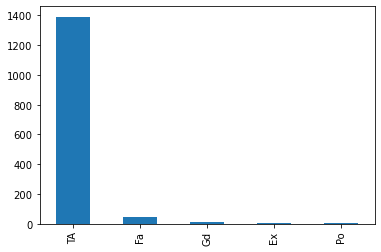

In [61]:
df["GarageQual"].value_counts().plot(kind = "bar")
plt.show()

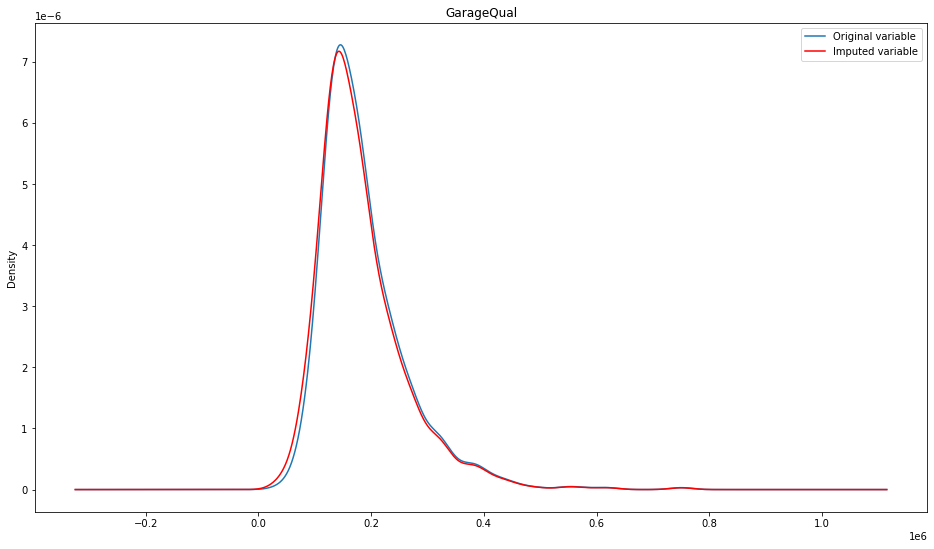

In [62]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

temp.plot(kind = "kde", ax = ax)

# distribution of the variable after imputation
df[df["GarageQual"] == "TA"]["SalePrice"].plot(kind = "kde", ax = ax, color = "red")

lines, labels = ax.get_legend_handles_labels()
labels = ["Original variable", "Imputed variable"]
ax.legend(lines, labels, loc = "best")

plt.title("GarageQual")
plt.show()

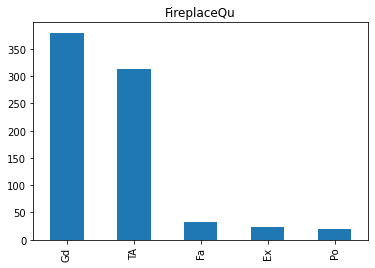

In [63]:
df["FireplaceQu"].value_counts().plot(kind = "bar")
plt.title("FireplaceQu")
plt.show()

In [64]:
df["FireplaceQu"].mode()

0    Gd
dtype: object

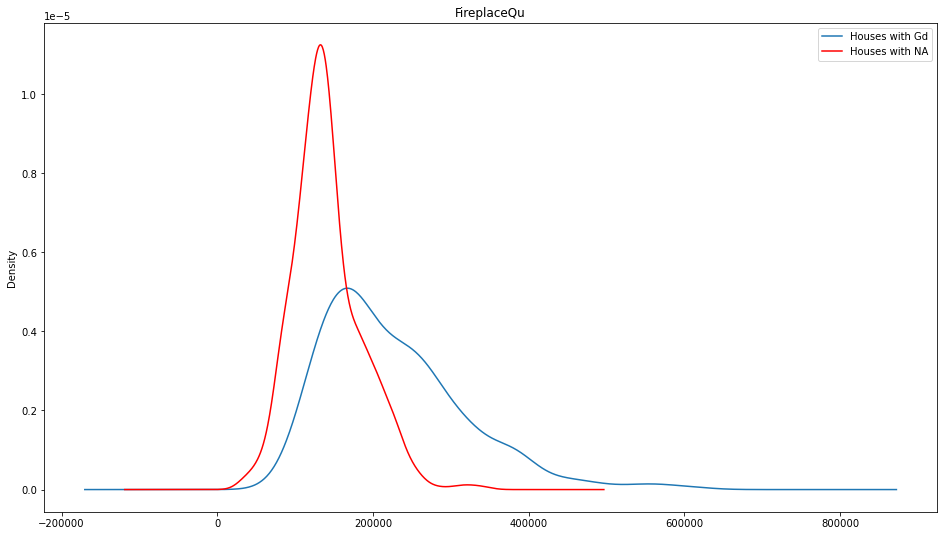

In [65]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

df[df["FireplaceQu"] == "Gd"]["SalePrice"].plot(kind = "kde", ax = ax)

df[df["FireplaceQu"].isnull()]["SalePrice"].plot(kind = "kde", ax = ax, color = "red")

lines, labels = ax.get_legend_handles_labels()
labels = ["Houses with Gd", "Houses with NA"]
ax.legend(lines, labels, loc = "best")

plt.title("FireplaceQu")
plt.show()

In [66]:
temp = df[df["FireplaceQu"] == "Gd"]["SalePrice"]

df["FireplaceQu"].fillna("Gd", inplace = True)

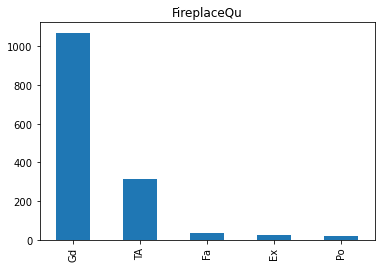

In [67]:
df["FireplaceQu"].value_counts().plot(kind = "bar")
plt.title("FireplaceQu")
plt.show()

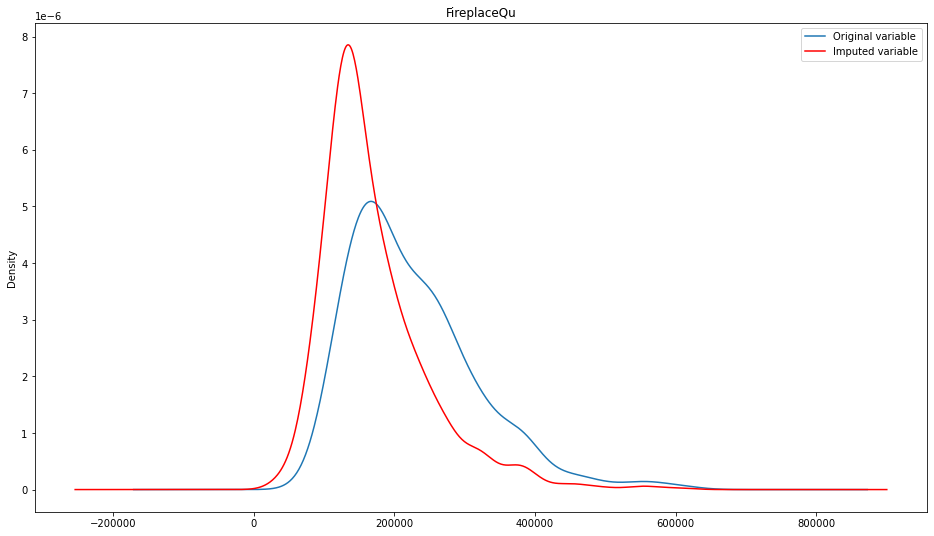

In [68]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

temp.plot(kind = "kde", ax = ax)

# distribution of the variable after imputation
df[df["FireplaceQu"] == "Gd"]["SalePrice"].plot(kind = "kde", ax = ax, color = "red")

lines, labels = ax.get_legend_handles_labels()
labels = ["Original variable", "Imputed variable"]
ax.legend(lines, labels, loc = "best")

plt.title("FireplaceQu")
plt.show()

#### Using Scikit Learn

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ["SalePrice"]), df["SalePrice"], test_size = 0.2)

In [70]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "most_frequent")

X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

In [71]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

### Missing Category Imputation

#### Without Using Scikit Learn

In [73]:
df = pd.read_csv("../Datasets/Housing/train.csv", usecols = ["GarageQual", "FireplaceQu", "SalePrice"])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [74]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [75]:
df["GarageQual"].fillna("Missing", inplace = True)

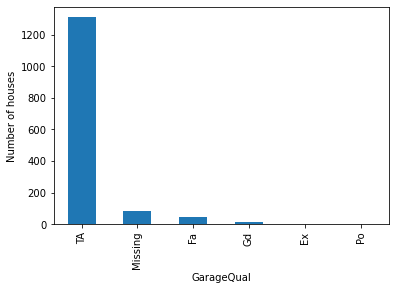

In [78]:
df["GarageQual"].value_counts().sort_values(ascending = False).plot(kind = "bar")
plt.xlabel("GarageQual")
plt.ylabel("Number of houses")
plt.show()

#### Using Scikit Learn

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ["SalePrice"]), df["SalePrice"], test_size = 0.2)

In [80]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "constant", fill_value = "Missing")

X_train = imputer.fit_transform(X_train)
X_test  = imputer.transform(X_test)

imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

## Random Sample Imputation

If there are missing values, then you will fill up those missing values with random values. These random values are those values which are present into your data. It can be applied on both categorical and numerical columns.

**Advantages:**

- It is easy.
- The distribution will not change allmost.

**Disadvantages:**

- The co-variance will disturb
- Memory heavy for deployment, as we need to store the original training set to extract values from and replace the NA in coming observations

**This technique will behave good with linear based algorithms, not good with tree based algorithms like Decition Tree algorithm.**

### Handling Numerical Data

In [88]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None  # default='warn'

In [82]:
df = pd.read_csv("../Datasets/Titanic/train.csv", usecols = ["Age", "Fare", "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [83]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [84]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed']  = X_test['Age']

In [86]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

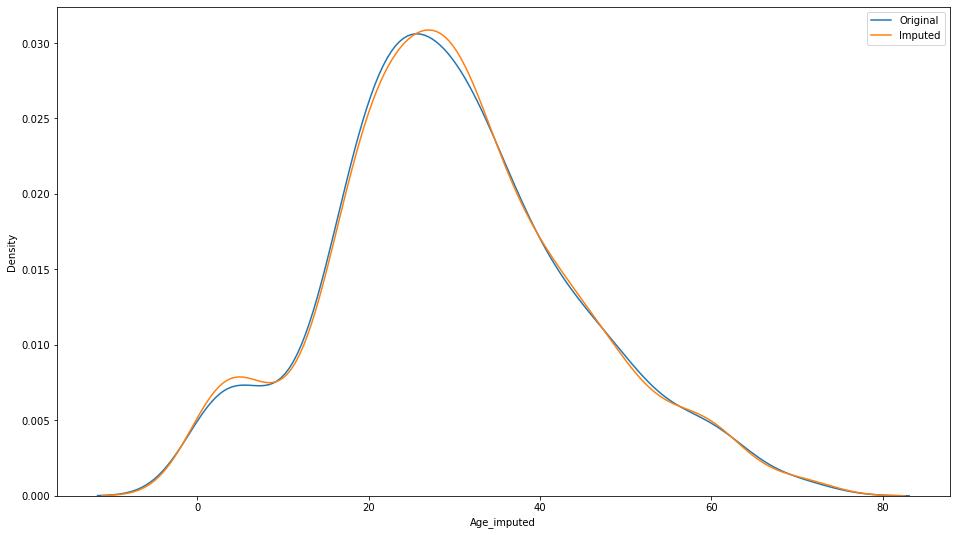

In [89]:
plt.figure(figsize = (16, 9))
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [90]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  206.20076456565354


In [91]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,63.762490
Age,71.512440,204.349513,204.349513
Age_imputed,63.762490,204.349513,206.200765


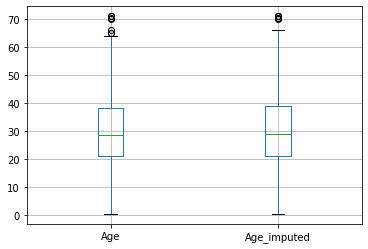

In [92]:
X_train[['Age', 'Age_imputed']].boxplot()
plt.show()

In [93]:
# In production level, one customer is not filled up the age. So out model will fill that with one
# random value. Again if that user didn't fill up age, that time random age selected by model will
# be different with the first one. This have to stop because these two cases user will get
# two different results. That is not good.
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

### Handling Categorical Data

In [94]:
data = pd.read_csv('../Datasets/Housing/train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [95]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [96]:
X = data
y = data['SalePrice']

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [98]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [99]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
169,TA,TA,228000,TA,TA
466,Po,TA,167000,TA,Po
1233,NaN,TA,142000,TA,NaN
868,TA,TA,169000,TA,TA
539,TA,TA,272000,TA,TA


In [100]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [101]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [102]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.646465
TA,0.412439,0.542088
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.032548


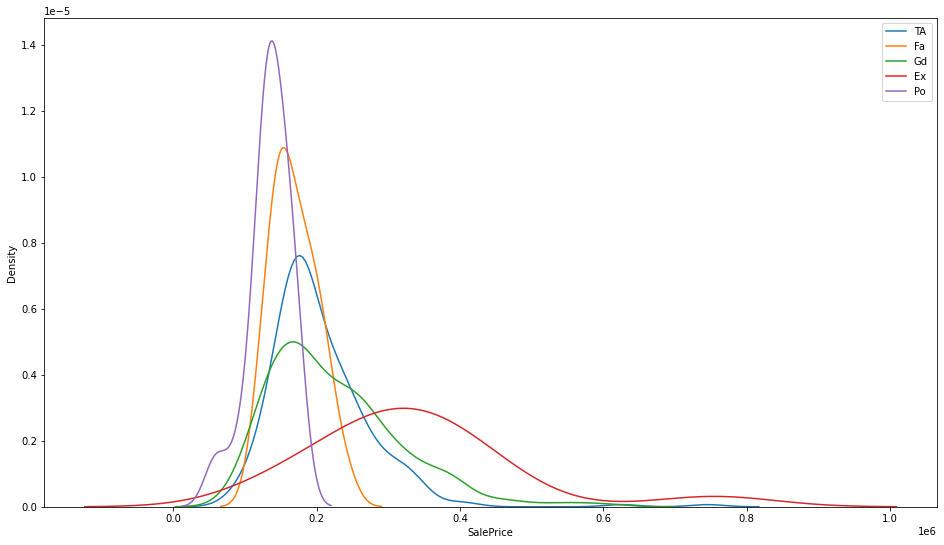

In [115]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, ax = ax, label=category)
    
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = "best")

plt.show()

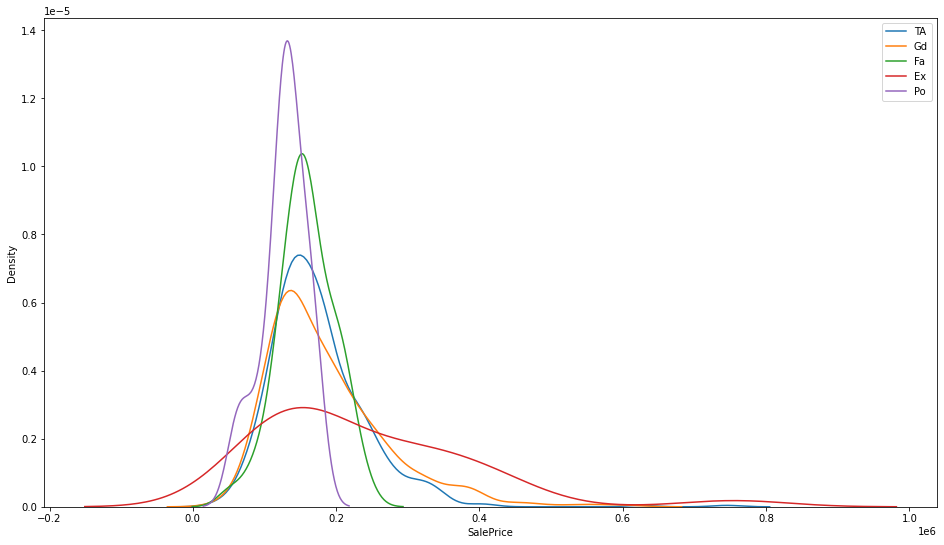

In [117]:
fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False, label=category, ax = ax)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = "best")

plt.show()

## Missing Indicator

You have to create a column for that column which has missing values. And the values for the new column are either **"True"** or **"False"**.

| Age | Age_NA | Fare | Fare_NA |
| :--: | :--: | :--: | :--: |
| 27 | 32 | False | False |
| 41 | NA | False | True |
| NA | 41 | True | False |
| 62 | 32 | False | False |

In [119]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator,SimpleImputer

pd.options.mode.chained_assignment = None  # default='warn'

In [120]:
df = pd.read_csv("../Datasets/Titanic/train.csv", usecols = ["Age", "Fare", "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [121]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

### Without Using Missing Indicator, Accuracy Score

In [122]:
si          = SimpleImputer()

X_train_trf = si.fit_transform(X_train)
X_test_trf  = si.transform(X_test)

In [123]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [124]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

### Using Missing Indicator, Accuracy Score

In [125]:
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [126]:
mi.features_

array([0], dtype=int64)

In [128]:
X_train_missing = mi.transform(X_train)
X_test_missing  = mi.transform(X_test)
X_train_missing[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True]])

In [129]:
X_train['Age_NA'] = X_train_missing
X_test['Age_NA']  = X_test_missing

In [130]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2  = si.transform(X_test)

In [131]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

### Using Scikit Learn

In [132]:
si      = SimpleImputer(add_indicator = True)

X_train = si.fit_transform(X_train)
X_test  = si.transform(X_test)

In [133]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2, y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

## Automatically Select Value for Imputation

In [138]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn import set_config

set_config(display='diagram')
pd.options.mode.chained_assignment = None  # default='warn'

In [135]:
df = pd.read_csv('../Datasets/Titanic/train.csv')
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [136]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [137]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [139]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [140]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [141]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [142]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [143]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [144]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [145]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10,most_frequent,mean,0.787852
9,10,most_frequent,median,0.787852
10,10,constant,mean,0.787852
11,10,constant,median,0.787852
12,100,most_frequent,mean,0.787852
13,100,most_frequent,median,0.787852


## KNN Imputer

| Sl. No. | Feature 1 | Feature 2 | Feature 3 | Feature 4 |
| :--: | :--: | :--: | :--: | :--: |
| 1 | 33 | | 67 | 21 |
| 2 | | 45 | 68 | 12 |
| 3 | 23 | 51 | 71 | 18 |
| 4 | 40 | | 81 |
| 5 | 35 | 60 | 79 | |

KNN imputer works based on KNN Algorithm. If there is any missing data of a row, then that missing value will be filled to the value of that row(s) which is/are most similar to the missing data row. In KNN, k means number of neighbours. If k = 2, then there will be used 2 most similar rows to fill the missing value. If k = 1, then the most similar row will be used to fill. Like, if you want to fill up the *feature 1* of *Sl No. 2* and k = 3. That time, you will select *33 from feature 1 of Sl. No 1* and *23 from feature 1 of Sl. No. 3* and their mean (Let's assume these 2 rows are most similar to the 2nd row).

**Steps**

- **First find k neighbours.** Here we can't use euclidean distance to identify the neighbours because there can be a possibility that there are some missing values to other features like *feature2 of Sl. No. 1*. That time we will use **nan-euclidean distance.** You can see this documentation page of Scikit Learn https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.nan_euclidean_distances.html. So, according to this, the distance between 1st row and 2nd row is
$$\text{distance between 1st and 2nd row} = \sqrt{\frac{3}{2}[(67 - 68)^2 + (21-12)^2]} = 11.09 $$
 where $\frac{3}{2}$ is called weight. 3 is choosed because there are another 3 features (feature2, feature3 and feature4) and from these 3 features 2 features are available (feature3 and feature4, feature2 has missing value).
 $$\text{distance between 2nd and 3rd row} = \sqrt{\frac{3}{3}[(45-51)^2 + (68-71)^2 + (12-18)^2]} = 9$$ 
 
 $$\text{distance between 2nd and 4th row} = \sqrt{\frac{3}{1}(81 - 68)^2} = 22.52$$
 
 $$\text{distance between 2nd and 5th row} = \sqrt{\frac{3}{2}[(45-60)^2 + (68-79)^2]} = 22.78$$
 
 If K = 2, then according to the distances value from row 2, row 1 and row 3 are closest.
- **Find the mean value.** The two values of feature1 of row 1 and row 3 are respectively 33 and 23. So, the missing value of row 2 feature1 will be,

$$ feature1, row2 = \frac{33 + 23}{2} = 28 $$

**Advantages:**

- More accurate

**Disadvantages:**

- More no. of calculations
- Have to pass the training set to production.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('../Datasets/Titanic/train.csv')[['Age','Pclass','Fare','Survived']]
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [3]:
df.isnull().mean() * 100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [5]:
knn = KNNImputer(n_neighbors = 3, weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf  = knn.transform(X_test)

In [6]:
lr     = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [7]:
# Comparision with Simple Imputer --> mean

si           = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2  = si.transform(X_test)

In [8]:
lr      = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred2 = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6927374301675978

## Iterative Imputer/MICE
**MICE stands for Multivariate Imputation by Chained Equations.**

**Assumptions:**

- Data is MAR (Missing At Random). You can predict the missing value by other rows.

**Advantages:**

- Accurate

**Disadvantages:**

- Slow
- Have to pass the training set to production.

| | R&D Spend | Administration | Marketing Spend | Profit |
| :--: | :--: | :--: | :--: | :--: |
| 21 | 8.0 | 15.0 | 30.0 | 11.0 |
| 37 | NaN | 5.0 | 20.0 | 9.0 |
| 2 | 15.0 | 10.0 | 41.0 | 19.0 |
| 14 | 12.0 | NaN | 26.0 | 13.0 |
| 44 | 2.0 | 15.0 | NaN | 7.0 |

**Step 1 - Fill all the NaN values with mean of respective cols**

| | R&D Spend | Administration | Marketing Spend | Profit |
| :--: | :--: | :--: | :--: | :--: |
| 21 | 8.0 | 15.0 | 30.0 | 11.0 |
| 37 | 9.25 | 5.0 | 20.0 | 9.0 |
| 2 | 15.0 | 10.0 | 41.0 | 19.0 |
| 14 | 12.0 | 11.25 | 26.0 | 13.0 |
| 44 | 2.0 | 15.0 | 29.25 | 7.0 |

**Step 2 - Remove all col1 missing values**

| | R&D Spend | Administration | Marketing Spend | Profit |
| :--: | :--: | :--: | :--: | :--: |
| 21 | 8.0 | 15.0 | 30.0 | 11.0 |
| 37 | NaN | 5.0 | 20.0 | 9.0 |
| 2 | 15.0 | 10.0 | 41.0 | 19.0 |
| 14 | 12.0 | 11.25 | 26.0 | 13.0 |
| 44 | 2.0 | 15.0 | 29.25 | 7.0 |

After removing all the missing values to NaN values of column1, a new technique is used. Now this column1 (here, R&D Spend) will become target column and other 2 columns (here, Administration & Marketing Spend) will become independent variables. Now have to perform machine learning algorithms. Using the new independent and dependent variables, the ml model is trained and it is used to predict the missing value by giving the two other independent variables' values as input.

**Step 3 - Predict the missing values of col1 using other cols**

| | R&D Spend | Administration | Marketing Spend | Profit |
| :--: | :--: | :--: | :--: | :--: |
| 21 | 8.0 | 15.0 | 30.0 | 11.0 |
| 37 | 23.14 | 5.0 | 20.0 | 9.0 |
| 2 | 15.0 | 10.0 | 41.0 | 19.0 |
| 14 | 12.0 | 11.25 | 26.0 | 13.0 |
| 44 | 2.0 | 15.0 | 29.25 | 7.0 |

**Step 4 - Remove all col2 missing values**

| | R&D Spend | Administration | Marketing Spend | Profit |
| :--: | :--: | :--: | :--: | :--: |
| 21 | 8.0 | 15.0 | 30.0 | 11.0 |
| 37 | 23.14 | 5.0 | 20.0 | 9.0 |
| 2 | 15.0 | 10.0 | 41.0 | 19.0 |
| 14 | 12.0 | NaN | 26.0 | 13.0 |
| 44 | 2.0 | 15.0 | 29.25 | 7.0 |

and repeat the steps to fill up all the missing values. Now finally this table came:

| | R&D Spend | Administration | Marketing Spend | Profit |
| :--: | :--: | :--: | :--: | :--: |
| 21 | 8.0 | 15.0 | 30.0 | 11.0 |
| 37 | **23.14** | 5.0 | 20.0 | 9.0 |
| 2 | 15.0 | 10.0 | 41.0 | 19.0 |
| 14 | 12.0 | **11.06** | 26.0 | 13.0 |
| 44 | 2.0 | 15.0 | **31.56** | 7.0 |

**Now completed the big set 1. Time to big set 2.**

![Iterative Imputation](./images/image-5.png)

![Iterative Imputation](./images/image-6.png)

![Iterative Imputation](./images/image-7.png)

Thus you will repeat the iteration again and again until the differences do not close come to zero.

In [9]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

pd.options.mode.chained_assignment = None

In [10]:
df = np.round(pd.read_csv('../Datasets/50_Startups.csv')[['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df = df.sample(5)
df

,R&D Spend,Administration,Marketing Spend,Profit
21,8.0,15.0,30.0,11.0
37,4.0,5.0,20.0,9.0
2,15.0,10.0,41.0,19.0
14,12.0,16.0,26.0,13.0
44,2.0,15.0,3.0,7.0


In [11]:
df = df.iloc[:,0:-1]
df

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,4.0,5.0,20.0
2,15.0,10.0,41.0
14,12.0,16.0,26.0
44,2.0,15.0,3.0


In [12]:
df.iloc[1,0]   = np.NaN
df.iloc[3,1]   = np.NaN
df.iloc[-1,-1] = np.NaN

df.head()

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,NaN,5.0,20.0
2,15.0,10.0,41.0
14,12.0,NaN,26.0
44,2.0,15.0,NaN


In [13]:
# Step 1 - Impute all missing values with mean of respective col

df0                    = pd.DataFrame()

df0['R&D Spend']       = df['R&D Spend'].fillna(df['R&D Spend'].mean())
df0['Administration']  = df['Administration'].fillna(df['Administration'].mean())
df0['Marketing Spend'] = df['Marketing Spend'].fillna(df['Marketing Spend'].mean())

# 0th Iteration
df0

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,9.25,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [14]:
# Remove the col1 imputed value
df1           = df0.copy()

df1.iloc[1,0] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.25,26.00
44,2.0,15.00,29.25


In [15]:
# Use first 3 rows to build a model and use the last for prediction

X = df1.iloc[[0,2,3,4],1:3]
X

,Administration,Marketing Spend
21,15.00,30.00
2,10.00,41.00
14,11.25,26.00
44,15.00,29.25


In [16]:
y = df1.iloc[[0,2,3,4],0]
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

In [17]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2))

array([23.14158651])

In [18]:
df1.iloc[1,0] = 23.14
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


In [19]:
# Remove the col2 imputed value

df1.iloc[3,1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.0,30.00
37,23.14,5.0,20.00
2,15.00,10.0,41.00
14,12.00,NaN,26.00
44,2.00,15.0,29.25


In [20]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[[0,1,2,4],[0,2]]
X

,R&D Spend,Marketing Spend
21,8.00,30.00
37,23.14,20.00
2,15.00,41.00
44,2.00,29.25


In [21]:
y = df1.iloc[[0,1,2,4],1]
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

In [22]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

array([11.06331285])

In [23]:
df1.iloc[3,1] = 11.06
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,29.25


In [24]:
# Remove the col3 imputed value
df1.iloc[4,-1] = np.NaN

df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.0
37,23.14,5.00,20.0
2,15.00,10.00,41.0
14,12.00,11.06,26.0
44,2.00,15.00,NaN


In [25]:
# Use last 3 rows to build a model and use the first for prediction
X = df1.iloc[0:4,0:2]
X

,R&D Spend,Administration
21,8.00,15.00
37,23.14,5.00
2,15.00,10.00
14,12.00,11.06


In [26]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

In [27]:
lr = LinearRegression()
lr.fit(X,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

array([31.56351448])

In [28]:
df1.iloc[4,-1] = 31.56

In [29]:
# After 1st Iteration
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,31.56


In [30]:
# Subtract 0th iteration from 1st iteration

df1 - df0

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,13.89,0.00,0.00
2,0.00,0.00,0.00
14,0.00,-0.19,0.00
44,0.00,0.00,2.31


In [31]:
df2 = df1.copy()

df2.iloc[1,0] = np.NaN

df2

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.06,26.00
44,2.0,15.00,31.56


In [32]:
X = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

array([23.78627207])

In [33]:
df2.iloc[1,0] = 23.78

df2.iloc[3,1] = np.NaN
X = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))

array([11.22020174])

In [34]:
df2.iloc[3,1] = 11.22

df2.iloc[4,-1] = np.NaN

X = df2.iloc[0:4,0:2]
y = df2.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

array([38.87979054])

In [35]:
df2.iloc[4,-1] = 31.56
df2

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.78,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.22,26.00
44,2.00,15.00,31.56


In [36]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.0
37,0.64,0.00,0.0
2,0.00,0.00,0.0
14,0.00,0.16,0.0
44,0.00,0.00,0.0


In [37]:
df3 = df2.copy()

df3.iloc[1,0] = np.NaN

df3

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.22,26.00
44,2.0,15.00,31.56


In [38]:
X = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

array([24.57698058])

In [39]:
df3.iloc[1,0] = 24.57

In [40]:
df3.iloc[3,1] = np.NaN
X             = df3.iloc[[0,1,2,4],[0,2]]
y             = df3.iloc[[0,1,2,4],1]

lr            = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

array([11.37282844])

In [41]:
df3.iloc[3,1] = 11.37

In [42]:
df3.iloc[4,-1] = np.NaN

X              = df3.iloc[0:4,0:2]
y              = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(X,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))

array([45.53976417])

In [43]:
df3.iloc[4,-1] = 45.53

In [44]:
df2.iloc[3,1] = 11.22

In [45]:
df3

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,24.57,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.37,26.00
44,2.00,15.00,45.53


In [46]:
df3 - df2

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,0.79,0.00,0.00
2,0.00,0.00,0.00
14,0.00,0.15,0.00
44,0.00,0.00,13.97


To use iterative imputer using scikit learn, visit https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html